In [1]:
# 📦 Imports
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
from tqdm import tqdm
import matplotlib.pyplot as plt

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


In [2]:
# 📍 Config
DATA_DIR = "balanced_dataset"  # Change this if needed
BATCH_SIZE = 32
EPOCHS = 15
NUM_CLASSES = 4
VAL_SPLIT = 0.2
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
# 🔄 Transformations
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

In [4]:
# 📂 Dataset
full_dataset = datasets.ImageFolder(DATA_DIR, transform=transform)
total_size = len(full_dataset)
val_size = int(VAL_SPLIT * total_size)
train_size = total_size - val_size

train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [5]:
# 🧠 CNN Model
class FingerprintCNN(nn.Module):
    def __init__(self):
        super(FingerprintCNN, self).__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Flatten(),
            nn.Linear(128 * 16 * 16, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, NUM_CLASSES)
        )

    def forward(self, x):
        return self.net(x)


In [6]:
# ⚙️ Setup
model = FingerprintCNN().to(DEVICE)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)

In [7]:
# 📈 Trackers
train_loss_history, val_loss_history = [], []
train_acc_history, val_acc_history = [], []

In [8]:
# 🚀 Training Loop
for epoch in range(EPOCHS):
    model.train()
    train_loss, correct, total = 0, 0, 0

    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{EPOCHS} - Training"):
        images, labels = images.to(DEVICE), labels.to(DEVICE)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    epoch_train_loss = train_loss / total
    epoch_train_acc = correct / total
    train_loss_history.append(epoch_train_loss)
    train_acc_history.append(epoch_train_acc)
    # 🧪 Validation
    model.eval()
    val_loss, correct, total = 0, 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(DEVICE), labels.to(DEVICE)
            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    epoch_val_loss = val_loss / total
    epoch_val_acc = correct / total
    val_loss_history.append(epoch_val_loss)
    val_acc_history.append(epoch_val_acc)


    print(f"\n✅ Epoch {epoch+1}/{EPOCHS} | Train Loss: {epoch_train_loss:.4f}, Acc: {epoch_train_acc:.4f} | Val Loss: {epoch_val_loss:.4f}, Acc: {epoch_val_acc:.4f}")

Epoch 1/15 - Training: 100%|██████████| 600/600 [11:43<00:00,  1.17s/it]



✅ Epoch 1/15 | Train Loss: 1.0244, Acc: 0.5077 | Val Loss: 0.7420, Acc: 0.6627


Epoch 2/15 - Training: 100%|██████████| 600/600 [04:40<00:00,  2.14it/s]



✅ Epoch 2/15 | Train Loss: 0.7160, Acc: 0.6832 | Val Loss: 0.5827, Acc: 0.7412


Epoch 3/15 - Training: 100%|██████████| 600/600 [04:48<00:00,  2.08it/s]



✅ Epoch 3/15 | Train Loss: 0.5885, Acc: 0.7411 | Val Loss: 0.5316, Acc: 0.7723


Epoch 4/15 - Training: 100%|██████████| 600/600 [04:48<00:00,  2.08it/s]



✅ Epoch 4/15 | Train Loss: 0.5140, Acc: 0.7705 | Val Loss: 0.4735, Acc: 0.7867


Epoch 5/15 - Training: 100%|██████████| 600/600 [04:48<00:00,  2.08it/s]



✅ Epoch 5/15 | Train Loss: 0.4587, Acc: 0.7935 | Val Loss: 0.4415, Acc: 0.8071


Epoch 6/15 - Training: 100%|██████████| 600/600 [04:47<00:00,  2.08it/s]



✅ Epoch 6/15 | Train Loss: 0.4107, Acc: 0.8179 | Val Loss: 0.4357, Acc: 0.8052


Epoch 7/15 - Training: 100%|██████████| 600/600 [04:47<00:00,  2.08it/s]



✅ Epoch 7/15 | Train Loss: 0.3734, Acc: 0.8310 | Val Loss: 0.4237, Acc: 0.8104


Epoch 8/15 - Training: 100%|██████████| 600/600 [04:44<00:00,  2.11it/s]



✅ Epoch 8/15 | Train Loss: 0.3531, Acc: 0.8395 | Val Loss: 0.4208, Acc: 0.8171


Epoch 9/15 - Training: 100%|██████████| 600/600 [04:43<00:00,  2.12it/s]



✅ Epoch 9/15 | Train Loss: 0.3281, Acc: 0.8497 | Val Loss: 0.4158, Acc: 0.8217


Epoch 10/15 - Training: 100%|██████████| 600/600 [04:45<00:00,  2.10it/s]



✅ Epoch 10/15 | Train Loss: 0.3103, Acc: 0.8584 | Val Loss: 0.4116, Acc: 0.8187


Epoch 11/15 - Training: 100%|██████████| 600/600 [04:44<00:00,  2.11it/s]



✅ Epoch 11/15 | Train Loss: 0.2859, Acc: 0.8682 | Val Loss: 0.4353, Acc: 0.8279


Epoch 12/15 - Training: 100%|██████████| 600/600 [04:43<00:00,  2.12it/s]



✅ Epoch 12/15 | Train Loss: 0.2669, Acc: 0.8790 | Val Loss: 0.4433, Acc: 0.8192


Epoch 13/15 - Training: 100%|██████████| 600/600 [04:48<00:00,  2.08it/s]



✅ Epoch 13/15 | Train Loss: 0.2561, Acc: 0.8829 | Val Loss: 0.4342, Acc: 0.8237


Epoch 14/15 - Training: 100%|██████████| 600/600 [04:45<00:00,  2.10it/s]



✅ Epoch 14/15 | Train Loss: 0.2461, Acc: 0.8883 | Val Loss: 0.4689, Acc: 0.8254


Epoch 15/15 - Training: 100%|██████████| 600/600 [04:47<00:00,  2.09it/s]



✅ Epoch 15/15 | Train Loss: 0.2296, Acc: 0.8923 | Val Loss: 0.5352, Acc: 0.8144


In [13]:
all_preds.extend(predicted.cpu().numpy())
all_labels.extend(labels.cpu().numpy())

cm = n_matrix(all_labels, all_preds)



NameError: name 'all_preds' is not defined

In [ ]:
print("\n🎯 Final Training Accuracy: {:.2f}%".format(train_acc_history[-1] * 100))
print("🎯 Final Validation Accuracy: {:.2f}%".format(val_acc_history[-1] * 100))


In [10]:
# 💾 Save Model
torch.save(model.state_dict(), "fingerprint_cnn_with_val.pth")
print("✅ Model saved as 'fingerprint_cnn_with_val.pth'")

✅ Model saved as 'fingerprint_cnn_with_val.pth'


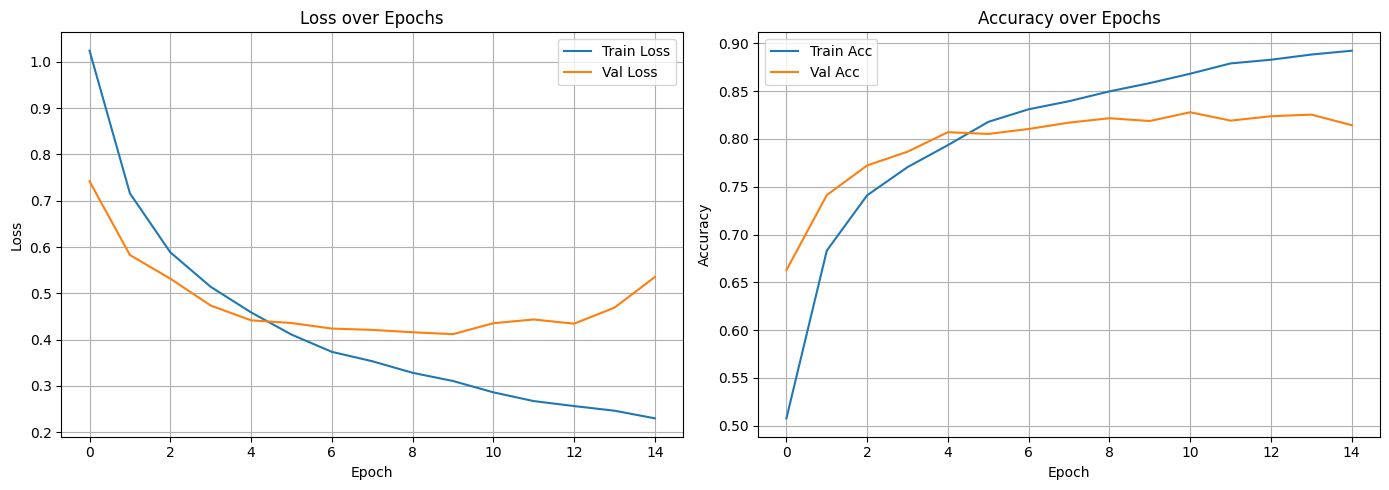

In [11]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss_history, label='Train Loss')
plt.plot(val_loss_history, label='Val Loss')
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_acc_history, label='Train Acc')
plt.plot(val_acc_history, label='Val Acc')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [12]:
#correlation and heat map
# 📊 Confusion Matrix Heatmap
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Real", "Easy", "Medium", "Hard"], 
            yticklabels=["Real", "Easy", "Medium", "Hard"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()


NameError: name 'all_labels' is not defined